# Exploratory Data Analysis

In [19]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px 
import datetime as dt 
from wordcloud import WordCloud, STOPWORDS

In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

In [3]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | Not a great experience. I co...,5.0,2024-01-18,United Kingdom,True,great experience could check online two separa...
1,Not Verified | I was excited to fly BA as I'd ...,3.0,2024-01-18,United Kingdom,False,verified excited fly ba travelled long haul yr...
2,Not Verified | I just want to warn everyone o...,2.0,2024-01-17,Germany,False,verified want warn everyone worst customer ser...
3,Not Verified | Paid for business class travell...,1.0,2024-01-16,United Kingdom,False,verified paid business class travelling cairo ...
4,✅ Trip Verified | The plane was extremely dir...,1.0,2024-01-15,Ireland,True,plane extremely dirty chocolate smudged mine c...


### What is the average overall rating given for British Airways?

In [4]:
avg_rate = df.stars.mean()
avg_rate

4.626609442060086

### What is the total counts for each ratings?

Text(0.5, 1.0, 'Counts for each ratings')

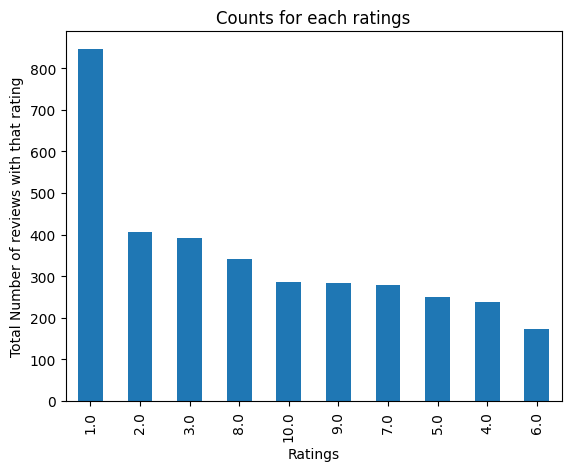

In [5]:
df.stars.value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Total Number of reviews with that rating')
plt.title('Counts for each ratings')

In [7]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

70 unique countries


### Which country most reviews comes from?

In [8]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [9]:
df_country_review.rename(columns={'total_reviews':'country',
                                  'count':'total_reviews'}, inplace=True)

In [10]:
print(df_country_review.columns)


Index(['country', 'total_reviews'], dtype='object')


Text(0.5, 1.0, 'Maximum number of review by country')

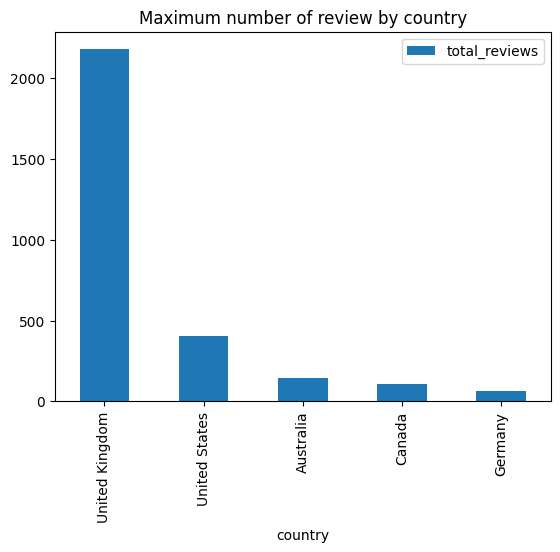

In [11]:
df_country_review.plot(kind='bar', x='country')
plt.title('Maximum number of review by country')

In [12]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user5\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user5\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user5\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,stars,date,country,verified,corpus,POS tagged
0,✅ Trip Verified | Not a great experience. I co...,5.0,2024-01-18,United Kingdom,True,great experience could check online two separa...,"[(✅, a), (Trip, n), (Verified, n), (|, n), (gr..."
1,Not Verified | I was excited to fly BA as I'd ...,3.0,2024-01-18,United Kingdom,False,verified excited fly ba travelled long haul yr...,"[(Verified, n), (|, n), (excited, v), (fly, v)..."
2,Not Verified | I just want to warn everyone o...,2.0,2024-01-17,Germany,False,verified want warn everyone worst customer ser...,"[(Verified, n), (|, n), (want, v), (warn, v), ..."
3,Not Verified | Paid for business class travell...,1.0,2024-01-16,United Kingdom,False,verified paid business class travelling cairo ...,"[(Verified, n), (|, n), (Paid, n), (business, ..."
4,✅ Trip Verified | The plane was extremely dir...,1.0,2024-01-15,Ireland,True,plane extremely dirty chocolate smudged mine c...,"[(✅, a), (Trip, n), (Verified, n), (|, v), (pl..."


In [16]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,stars,date,country,verified,corpus,POS tagged,Lemma
0,✅ Trip Verified | Not a great experience. I co...,5.0,2024-01-18,United Kingdom,True,great experience could check online two separa...,"[(✅, a), (Trip, n), (Verified, n), (|, n), (gr...",✅ Trip Verified | great experience . could c...
1,Not Verified | I was excited to fly BA as I'd ...,3.0,2024-01-18,United Kingdom,False,verified excited fly ba travelled long haul yr...,"[(Verified, n), (|, n), (excited, v), (fly, v)...",Verified | excite fly BA 'd travel long haul...
2,Not Verified | I just want to warn everyone o...,2.0,2024-01-17,Germany,False,verified want warn everyone worst customer ser...,"[(Verified, n), (|, n), (want, v), (warn, v), ...",Verified | want warn everyone bad customer s...
3,Not Verified | Paid for business class travell...,1.0,2024-01-16,United Kingdom,False,verified paid business class travelling cairo ...,"[(Verified, n), (|, n), (Paid, n), (business, ...",Verified | Paid business class travel Cairo ...
4,✅ Trip Verified | The plane was extremely dir...,1.0,2024-01-15,Ireland,True,plane extremely dirty chocolate smudged mine c...,"[(✅, a), (Trip, n), (Verified, n), (|, v), (pl...",✅ Trip Verified | plane extremely dirty choc...


### Sentiment Analysis using VADER

In [ ]:
!pip install vaderSentiment


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()



,reviews,stars,date,country,verified,corpus,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | Not a great experience. I co...,5.0,2024-01-18,United Kingdom,True,great experience could check online two separa...,"[(✅, a), (Trip, n), (Verified, n), (|, n), (gr...",✅ Trip Verified | great experience . could c...,0.9558,Positive
1,Not Verified | I was excited to fly BA as I'd ...,3.0,2024-01-18,United Kingdom,False,verified excited fly ba travelled long haul yr...,"[(Verified, n), (|, n), (excited, v), (fly, v)...",Verified | excite fly BA 'd travel long haul...,0.7269,Positive
2,Not Verified | I just want to warn everyone o...,2.0,2024-01-17,Germany,False,verified want warn everyone worst customer ser...,"[(Verified, n), (|, n), (want, v), (warn, v), ...",Verified | want warn everyone bad customer s...,0.7012,Positive
3,Not Verified | Paid for business class travell...,1.0,2024-01-16,United Kingdom,False,verified paid business class travelling cairo ...,"[(Verified, n), (|, n), (Paid, n), (business, ...",Verified | Paid business class travel Cairo ...,-0.8437,Negative
4,✅ Trip Verified | The plane was extremely dir...,1.0,2024-01-15,Ireland,True,plane extremely dirty chocolate smudged mine c...,"[(✅, a), (Trip, n), (Verified, n), (|, v), (pl...",✅ Trip Verified | plane extremely dirty choc...,-0.8588,Negative


In [18]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    1975
Negative    1151
Neutral      369
Name: count, dtype: int64

### Visual representation

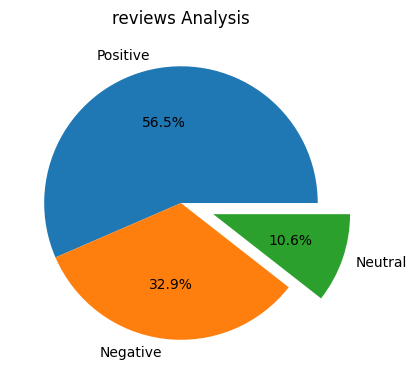

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title('reviews Analysis')
plt.pie(vader_counts.values, labels= vader_counts.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()
